In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyecharts.charts import Map
from pyecharts import options as opts

# 1. Create a Bar Chart for All Places at a Certain Date
## 1.1 Functions

In [2]:
def regularDate(MM, DD):
    
    # regularize the month input
    if ((MM > 0)&(MM < time.localtime(time.time())[1] + 1)):
        month = '0' + str(MM)
    else:
        print('Error: the MONTH selected does not exist.\n')
        print('Please enter a number more than 0 and less than', time.localtime(time.time())[1] + 1, 'for MONTH!')
        month = None
        
    # regularize the day input
    if MM == 1:
        if ((DD > 21)&(DD < 32)):
            day = str(DD)
        else:
            print('Error: the DAY selected in January does not exist.\n')
            print('Please enter a number more than 21 and less than 32 for DAY in January!')
            day = None
    elif MM == 2:
        if ((DD > 0)&(DD < 10)):
            day = '0' + str(DD)
        elif ((DD > 9)&(DD < 30)):
            day = str(DD)
        else:
            print('Error: the DAY selected in Febrary does not exist.\n')
            print('Please enter a number more than 0 and less than 30 for DAY in Febrary!')
            day = None
    elif MM == 3:
        if ((DD > 0)&(DD < 10)):
            day = '0' + str(DD)
        elif ((DD > 9)&(DD < 32)):
            day = str(DD)
        else:
            print('Error: the DAY selected in March does not exist.\n')
            print('Please enter a number more than 0 and less than 32 for DAY in March!')
            day = None
    elif MM == 4:
        if ((DD > 0)&(DD < 10)):
            day = '0' + str(DD)
        elif ((DD > 10)&(DD < time.localtime(time.time())[2])):
            day = str(DD)
        else:
            print('Error: the DAY selected in April does not exist.\n')
            print('Please enter a number more than 0 and less than', time.localtime(time.time())[2], 'for DAY in April!')
            day = None
            
    return (month, day)

In [3]:
def cleanBefore(data, n):
    
    out = pd.DataFrame(columns = ['PLACE', 'CONFI', 'DEATH', 'RECOV'])
    
    data['Country/Region'].replace('Mainland China', 'China', inplace = True)
    data['Province/State'] = data['Province/State'] + ', '
    data['Province/State'].fillna('', inplace = True)
    
    out['PLACE'] = data['Province/State'] + data['Country/Region'].astype('str')
    out['CONFI'] = data['Confirmed'].fillna(0)
    out['DEATH'] = data['Deaths'].fillna(0)
    out['RECOV'] = data['Recovered'].fillna(0)
    out['PLACE'].replace('Taiwan', 'Taiwan, China', inplace = True)
    out['SUM'] = out['CONFI'] + out['DEATH'] + out['RECOV']
    out.sort_values(by = 'SUM', inplace = True)
    out = out[~out['SUM'].isin([0])]
    
    if (out.shape[0] > n):
        out = out.tail(n)
        
    return out

In [4]:
def cleanAfter(data, n):
    
    data.drop(data[data['Province_State'] == 'Recovered'].index, inplace=True)
    data['Province_State'] = data['Province_State'] + ', '
    data['Province_State'].fillna('', inplace = True)
    data['Combined_Key'] = data['Province_State'] + data['Country_Region'].astype('str')
    
    grouped = data.groupby('Combined_Key', as_index = False)
    
    temp = np.array(grouped[['Confirmed', 'Deaths', 'Recovered']].agg(np.sum))
    newC = np.sum(temp[:,1:4], axis = 1)
    temp = np.c_[temp, newC]
    
    out = pd.DataFrame(temp, columns = ['PLACE', 'CONFI', 'DEATH', 'RECOV', 'SUM'])
    out['PLACE'].replace('Taiwan', 'Taiwan, China', inplace = True)
    out.sort_values(by = 'SUM', inplace = True)
    out = out[~out['SUM'].isin([0])]
    
    if (out.shape[0] > n):
        out = out.tail(n)
    
    return out

In [5]:
def createBar(MM = time.localtime(time.time())[1], DD = time.localtime(time.time())[2] - 1, n = 50):
        
    # 'MM' is the month, and 'DD' is the day
    # running without date, current date would be used
    # 'n'  is the number of countries with top-N sums
    # running without n, default value 50 would be used
    
    (month, day) = regularDate(MM, DD)
    
    # find the file with its name
    if ((month != None)&(day != None)):
        chartName = '2020-' + month + '-' + day
        
        fileName = './COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/' + month + '-' + day + '-' + '2020.csv'
        temp = pd.read_csv(fileName)
        
        # clean the dataset
        if ((MM < 3)|((MM == 3)&(DD < 22))):
            data = cleanBefore(temp, n)
        else:
            data = cleanAfter(temp, n)
        
        # draw the bar chart with the data
        fig = plt.figure(figsize = (n, 3*n/4))
        plt.barh(range(data.shape[0]), data['RECOV'], height = 0.8, label = 'Recovered', fc = '#71E16C', left = 0)
        plt.barh(range(data.shape[0]), data['CONFI'], height = 0.8, label = 'Confirmed', fc = '#FFD781', left = data['RECOV'])
        plt.barh(range(data.shape[0]), data['DEATH'], height = 0.8, label = 'Deaths', fc = '#FF8181', left = data['CONFI'] + data['RECOV'], tick_label = data['PLACE'])
        
        fontLegend = {'family': 'serif', 'weight': 'normal', 'size': n}
        plt.legend(prop = fontLegend)
        plt.xticks(family = 'serif', fontweight = 'normal', fontsize = int(2*n/3))
        plt.yticks(family = 'serif', fontweight = 'normal', fontsize = int(2*n/3))
        plt.title(chartName, family = 'serif', fontweight = 'normal', fontsize = int(4*n/3))
        plt.show()
        
        print('The distribution of Top', n, 'Places with the Largest Total Number of Cases on', chartName, '\n')
        
        data.sort_values(by = 'SUM', ascending = False, inplace = True)
        
        return data
    
    else:
        print('ERROR: The data doesn not exist!')
        return None

## 1.2 Demonstration

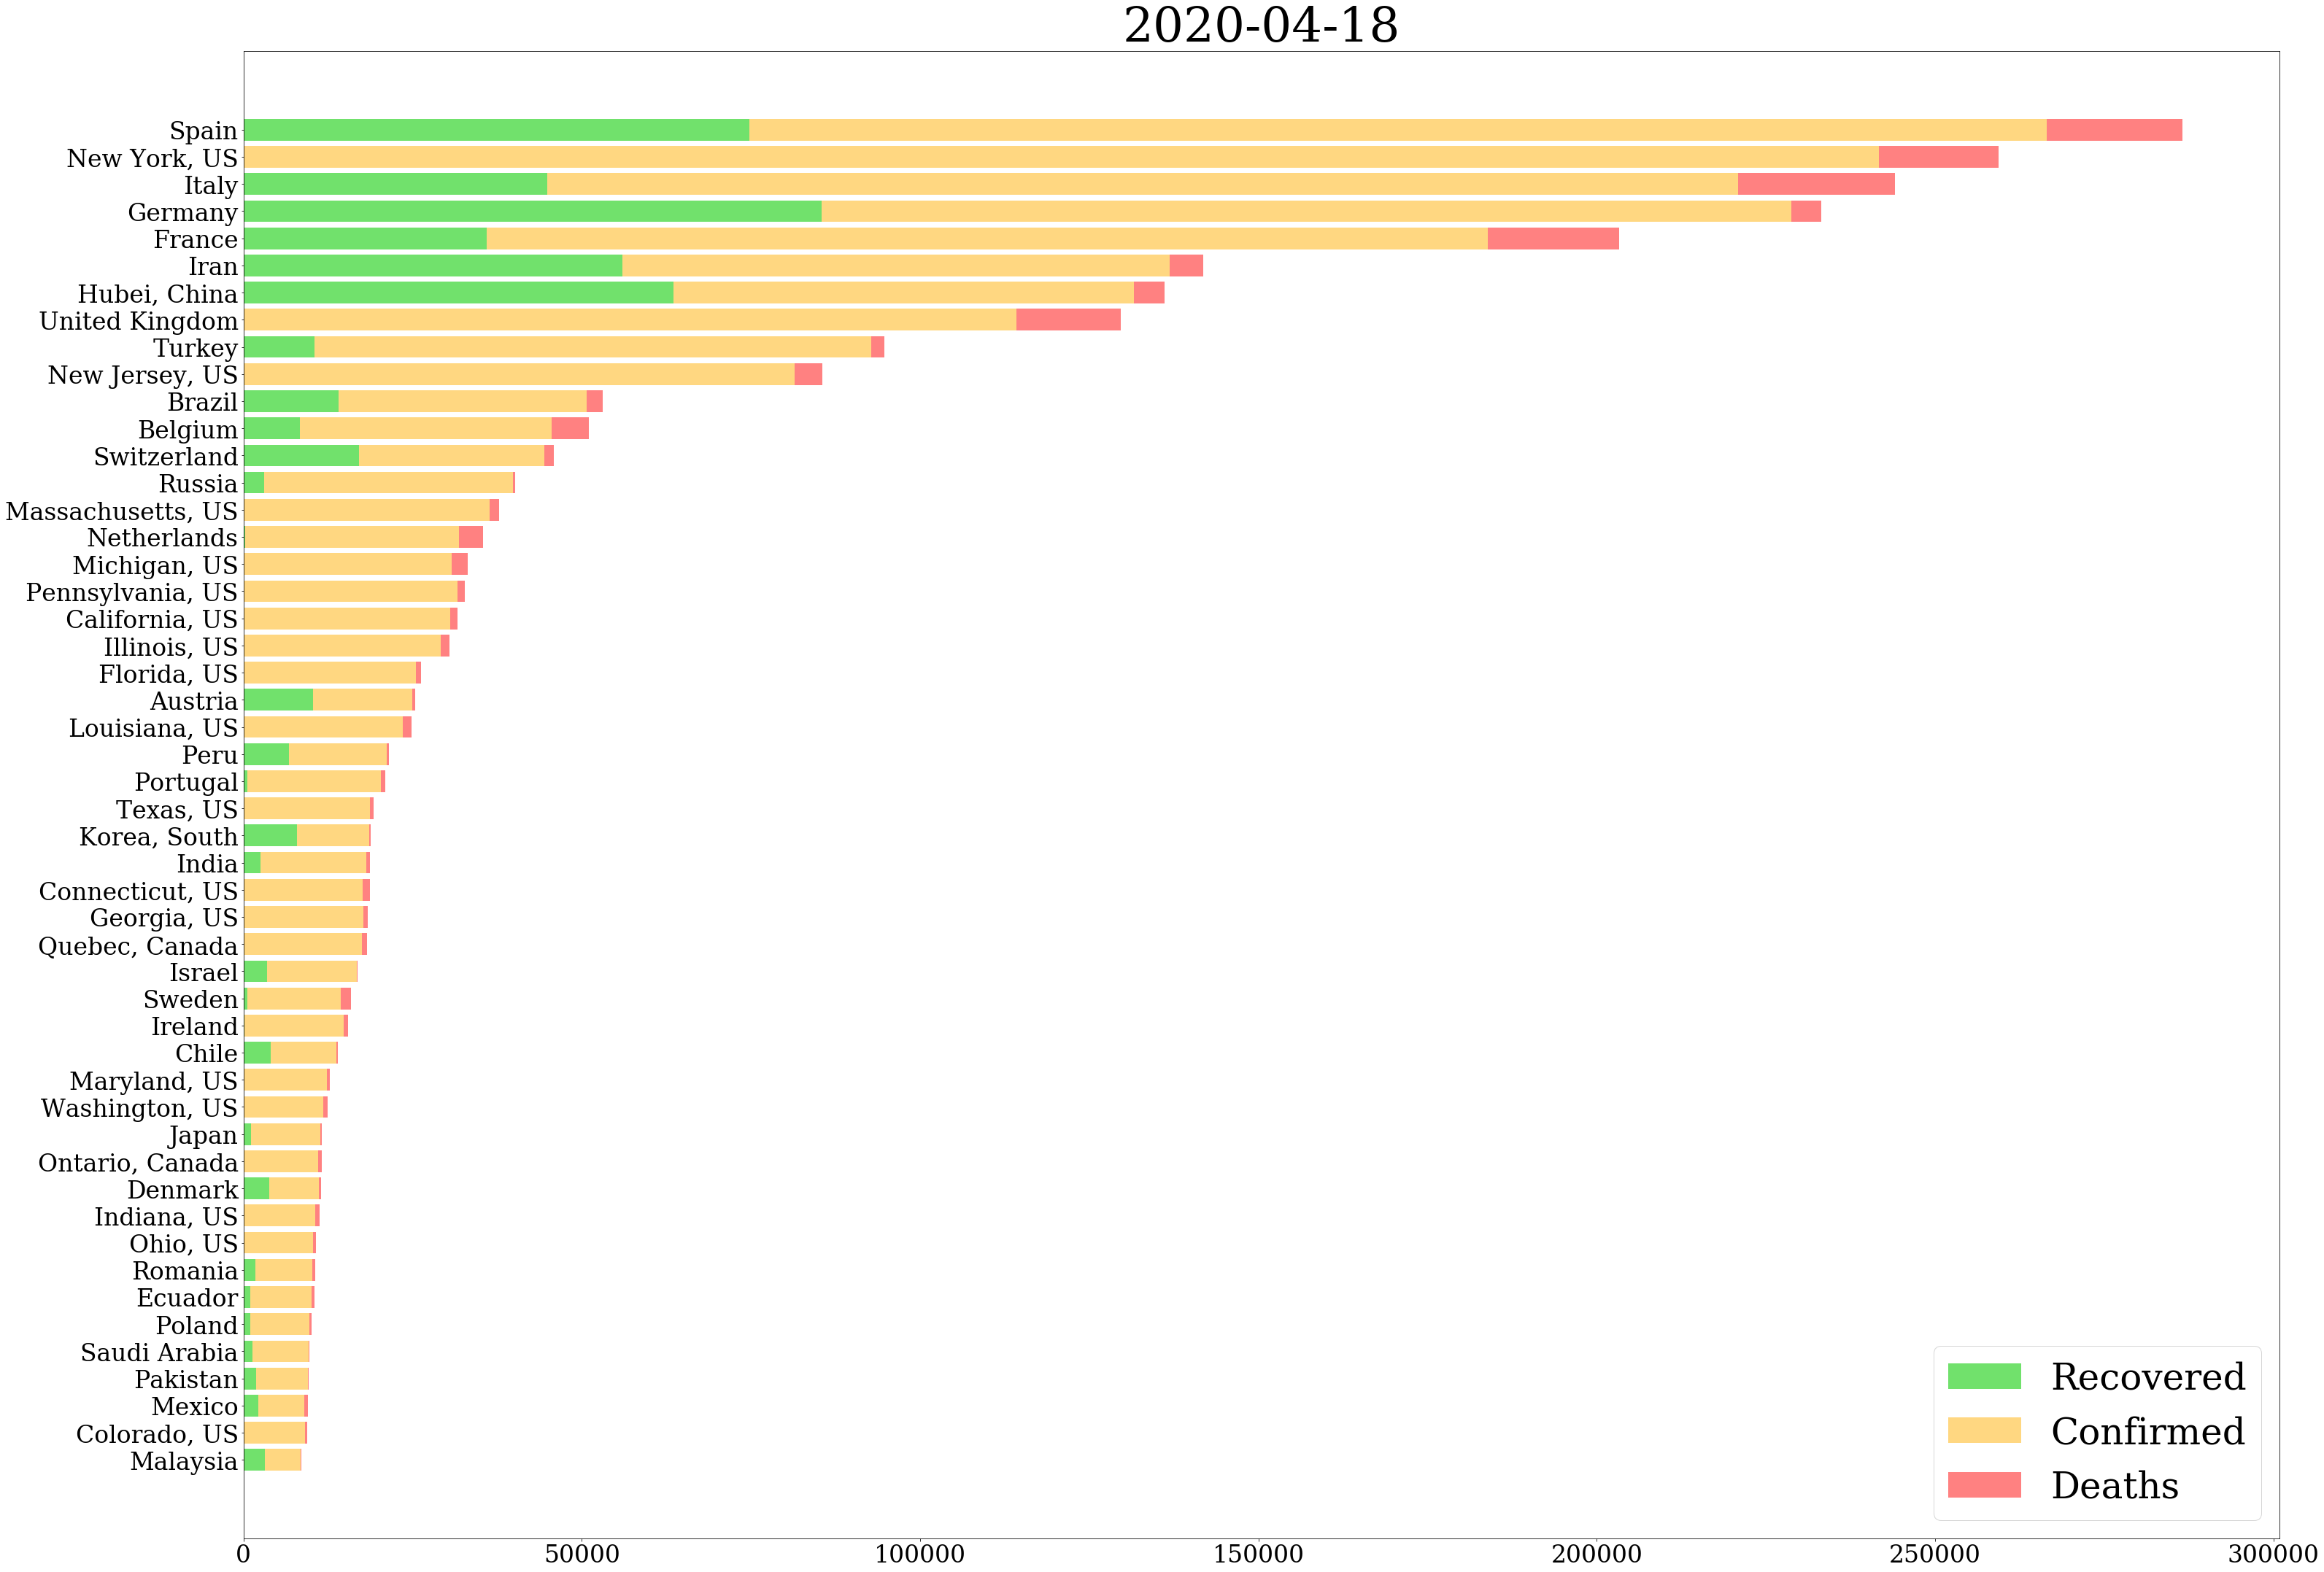

The distribution of Top 50 Places with the Largest Total Number of Cases on 2020-04-18 



In [6]:
defaultBar = createBar() # all default values are used

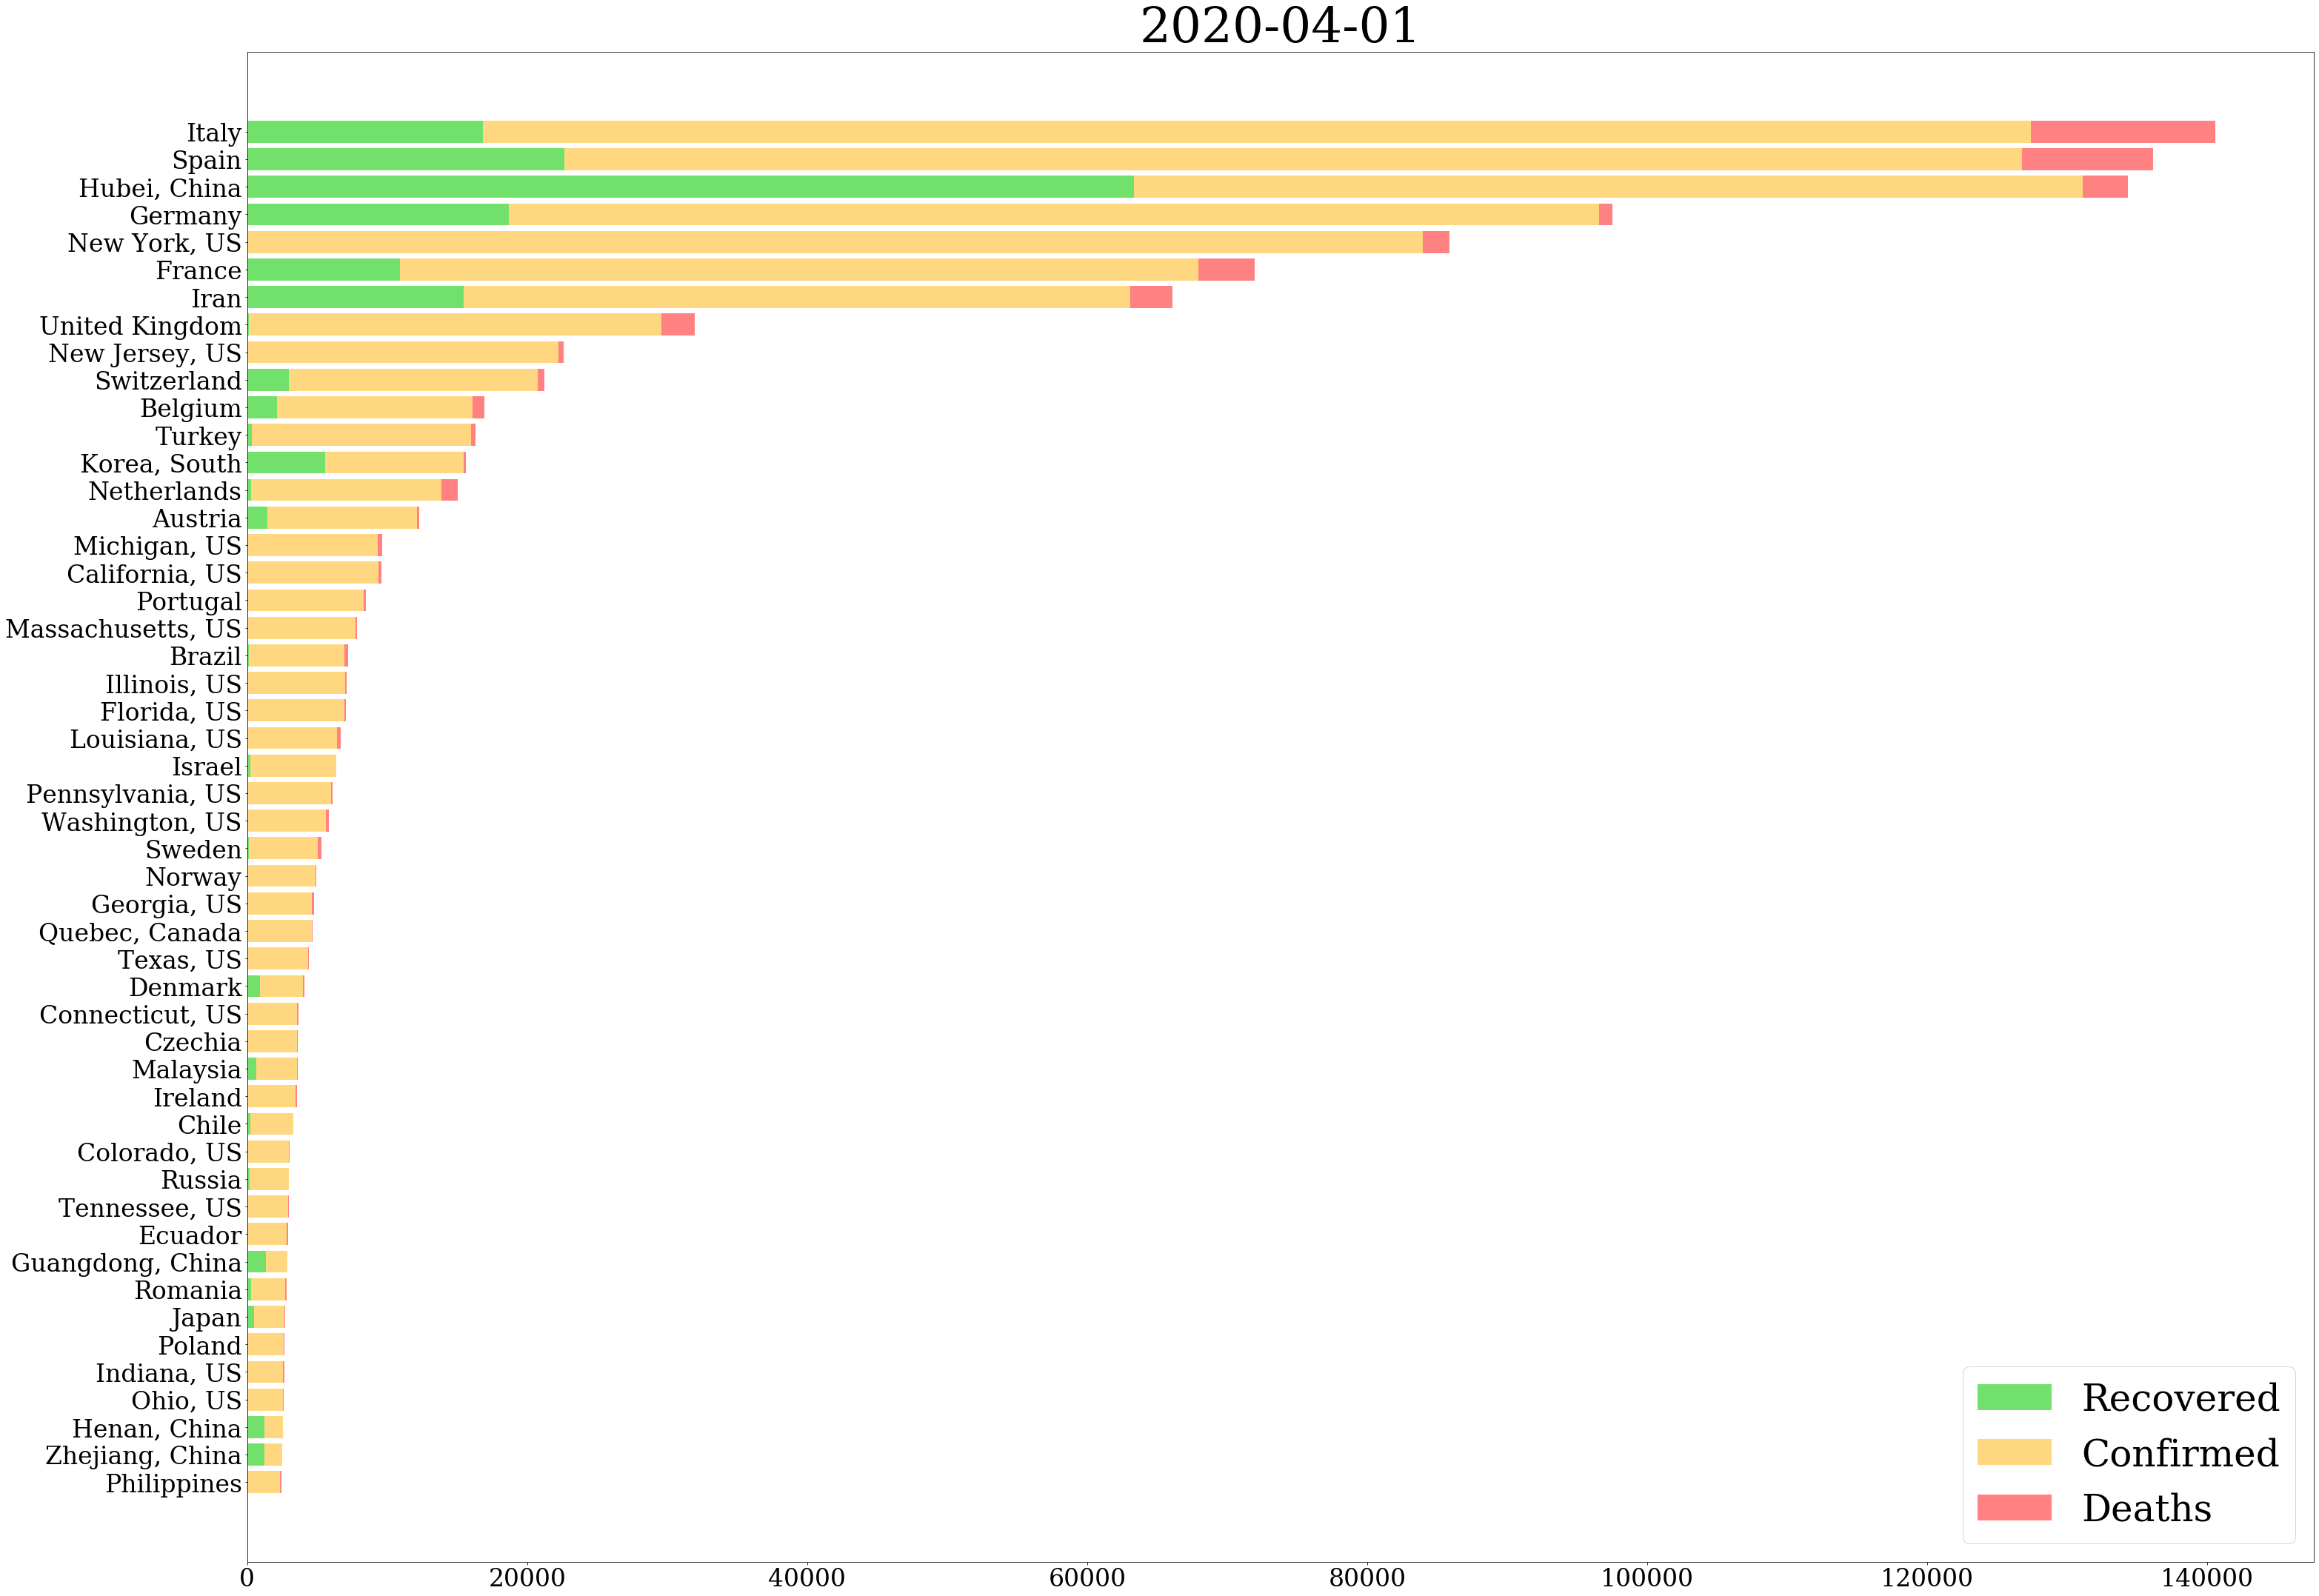

The distribution of Top 50 Places with the Largest Total Number of Cases on 2020-04-01 



In [7]:
certainDateBar = createBar(4, 1) # certain date and default number are used

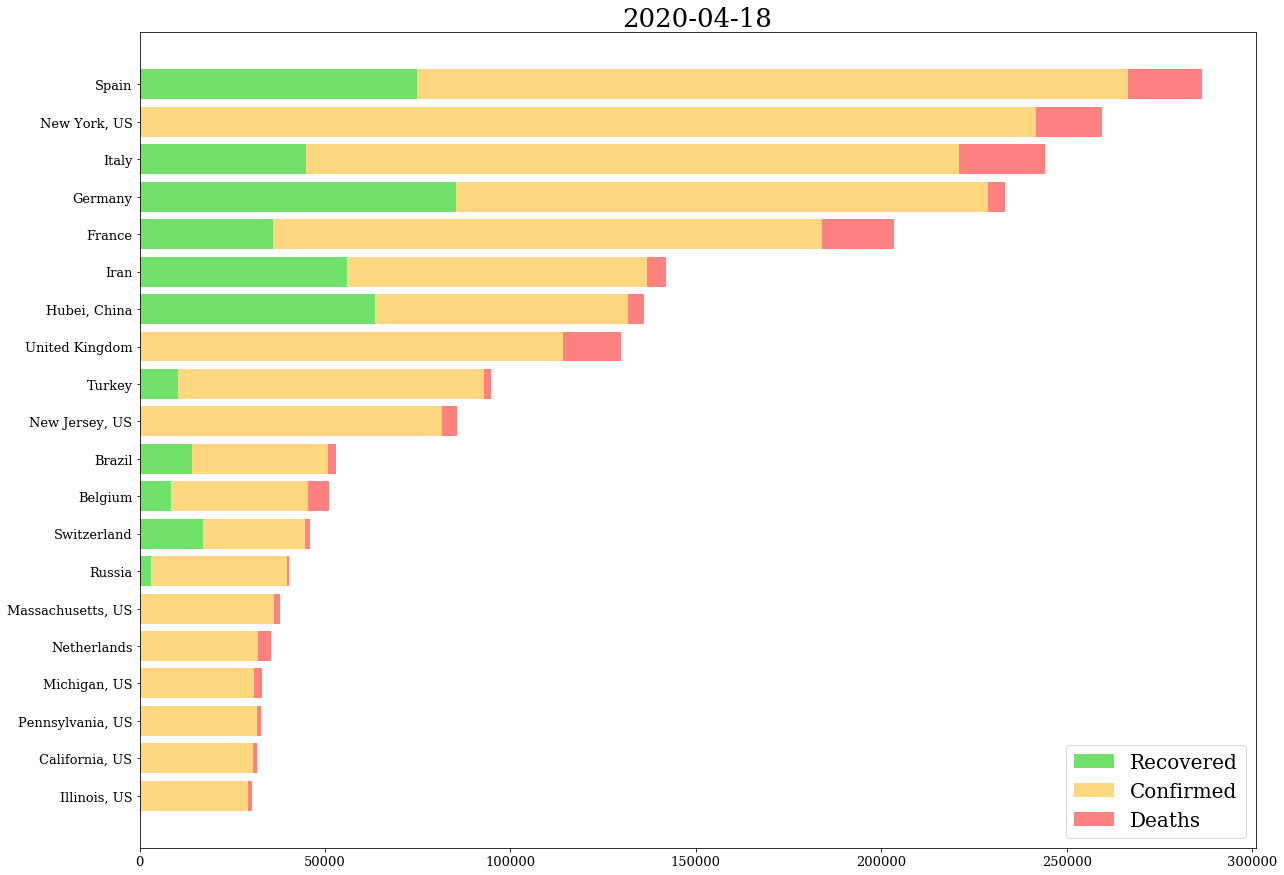

The distribution of Top 20 Places with the Largest Total Number of Cases on 2020-04-18 



In [8]:
certainNumberBar = createBar(n = 20) # default date and certain number are used

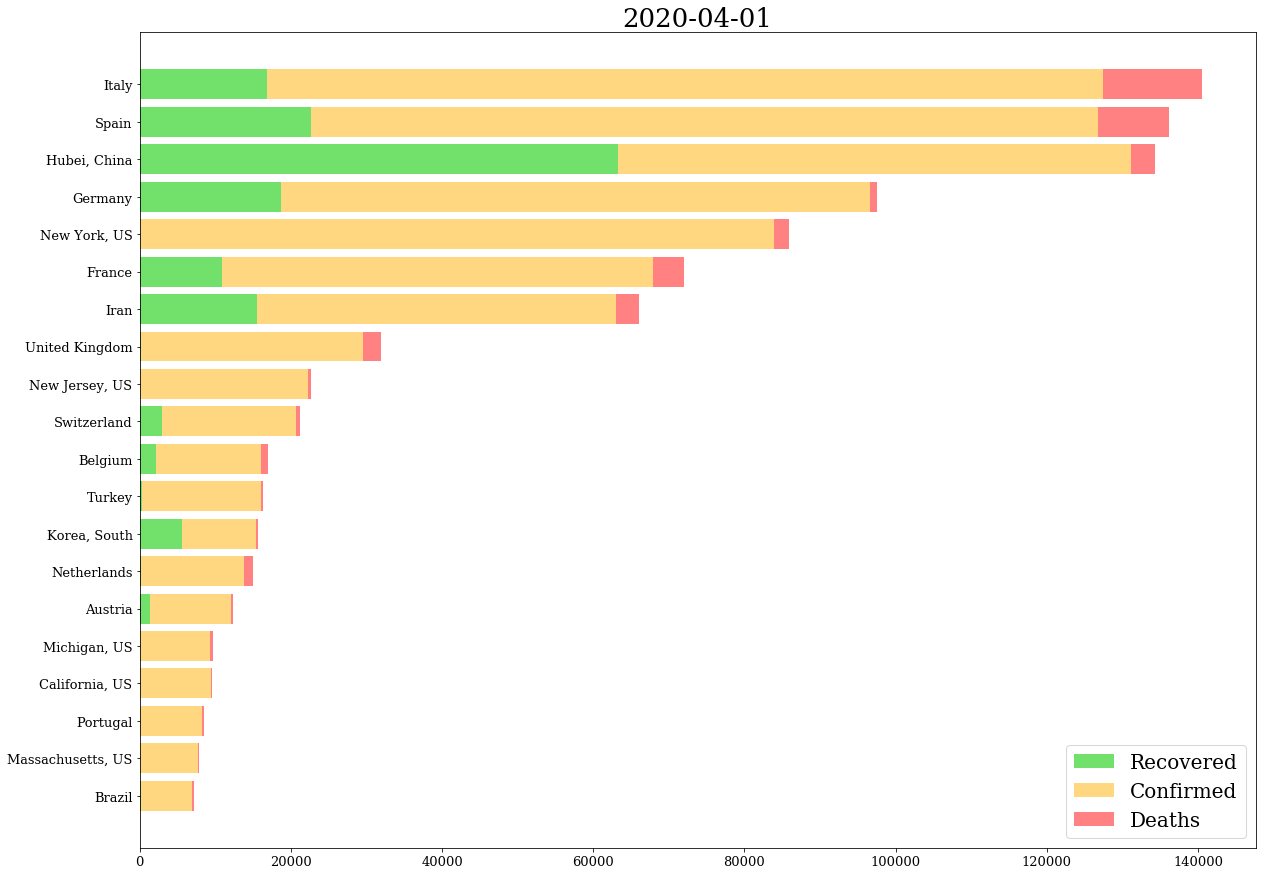

The distribution of Top 20 Places with the Largest Total Number of Cases on 2020-04-01 



In [9]:
certainBar = createBar(4, 1, 20) # all certain values are used

# 2. Create a Line Chart for a Certain Place
## 2.1 Functions

In [10]:
def placeSingle(PP, item):
    
    PP = str(PP)
    
    temp = pd.DataFrame()
    us = pd.DataFrame()
    
    if (item == 'recovered'):
        temp = pd.read_csv('./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
        US = False
    else:
        fileName = './COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_' + item + '_global.csv'
        usName = './COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_' + item + '_US.csv'
        temp = pd.read_csv(fileName)
        us = pd.read_csv(usName)
        US = True
        
    temp.loc[temp['Country/Region']=='Taiwan*', 'Province/State'] = 'Taiwan'
    temp.loc[temp['Country/Region']=='Taiwan*', 'Country/Region'] = 'China'
    
    # regularize the place input
    if (PP in temp['Province/State'].values):
        data = temp[temp['Province/State'].isin([PP])]
    elif (PP in temp['Country/Region'].values):
        data = temp[temp['Country/Region'].isin([PP])]
        temp = pd.DataFrame(data.iloc[:, 2:].apply(lambda x: x.sum())).T
        col_name = temp.columns.tolist()
        col_name.insert(0, 'Country/Region')
        col_name.insert(0, 'Province/State')
        temp = temp.reindex(columns=col_name)
        temp['Country/Region'] = PP
        data = temp
    elif (US):
        if (PP in us['Province_State'].values):
            data = us[us['Province_State'].isin([PP])]
            temp = pd.DataFrame(data.iloc[:, 8:].apply(lambda x: x.sum())).T
            col_name = temp.columns.tolist()
            col_name.insert(0, 'Country/Region')
            col_name.insert(0, 'Province/State')
            temp = temp.reindex(columns=col_name)
            temp['Country/Region'] = 'US'
            temp['Province/State'] = PP
            temp.drop(['Combined_Key'], axis = 1, inplace = True)
            data = temp
        else:
            data = pd.DataFrame()
    else:
        data = pd.DataFrame()
        
    return data

In [11]:
def cleanRow(data):
    
    if (data.shape[0] == 2):
        data = data.drop(['Population'], axis=1, inplace=True)
    else:
        data = data
    
    return data

In [12]:
def createLine(PP = 'Ireland'):
    
    # 'PP' is the place, default 'Ireland' is used
    
    confi = placeSingle(PP, 'confirmed')
    recov = placeSingle(PP, 'recovered')
    death = placeSingle(PP, 'deaths')
    
    if (recov.shape[0] != 0):
        data = pd.concat([recov, confi, death], axis = 0)
        data.drop(['Lat', 'Long'], axis=1, inplace=True)
        data.index = pd.Series(['Recovered', 'Confirmed', 'Deaths'])
    else:
        print('There is no information about RECOVERED CASES for the place selected.')
        data = pd.concat([confi, death], axis = 0)
        data.drop(['Lat', 'Long_', 'Population'], axis=1, inplace=True)
        data.index = pd.Series(['Confirmed', 'Deaths'])
    
    data['Province/State'] = data['Province/State'] + ', '
    data['Province/State'].fillna('', inplace = True)
    data['PLACE'] = data['Province/State'] + data['Country/Region'].astype('str')
    data.drop(['Province/State', 'Country/Region'], axis=1, inplace=True)
    place = data.iat[-1, -1]
    data.drop(['PLACE'], axis=1, inplace=True)
    data = data.astype('int')
    data = data.loc[:,~((data==0).all())]
    DATE = data.columns.values.tolist()
    data.loc['Date'] = DATE
    data = data.T
        
    # drawthe line chart with the data
    n = data.shape[0]
    fig = plt.figure(figsize = (n, 3*n/4))
    if (data.shape[1] == 3):
        plt.plot(data['Date'], data['Confirmed'], '#DD9922', label='Confirmed', linewidth = int(n/9), marker = 'o', markersize = int(n/5))
        plt.plot(data['Date'], data['Deaths'], '#992222', label='Deaths', linewidth = int(n/9), marker = 'o', markersize = int(n/5))
        plt.title(str(place), family = 'serif', fontweight = 'normal', fontsize = int(4*n/3))
        plt.xticks(family = 'serif', fontweight = 'normal', fontsize = int(1*n/2), rotation = 45)
        plt.yticks(family = 'serif', fontweight = 'normal', fontsize = int(2*n/3))
        fontLegend = {'family': 'serif', 'weight': 'normal', 'size': n}
        plt.legend(prop = fontLegend)
        plt.show()
        
        return data
    
    elif (data.shape[1] == 4):
        plt.plot(data['Date'], data['Recovered'], '#336633', label='Recovered', linewidth = int(n/9), marker = 'o', markersize = int(n/5))
        plt.plot(data['Date'], data['Confirmed'], '#DD9922', label='Confirmed', linewidth = int(n/9), marker = 'o', markersize = int(n/5))
        plt.plot(data['Date'], data['Deaths'], '#992222', label='Deaths', linewidth = int(n/9), marker = 'o', markersize = int(n/5))
        plt.title(str(place), family = 'serif', fontweight = 'normal', fontsize = int(4*n/3))
        plt.xticks(family = 'serif', fontweight = 'normal', fontsize = int(1*n/2), rotation = 45)
        plt.yticks(family = 'serif', fontweight = 'normal', fontsize = int(2*n/3))
        fontLegend = {'family': 'serif', 'weight': 'normal', 'size': n}
        plt.legend(prop = fontLegend)
        plt.show()
        
        return data
        
    else:
        print('ERROR: The data doesn not exist!')
        return None

## 2.2 Demonstration

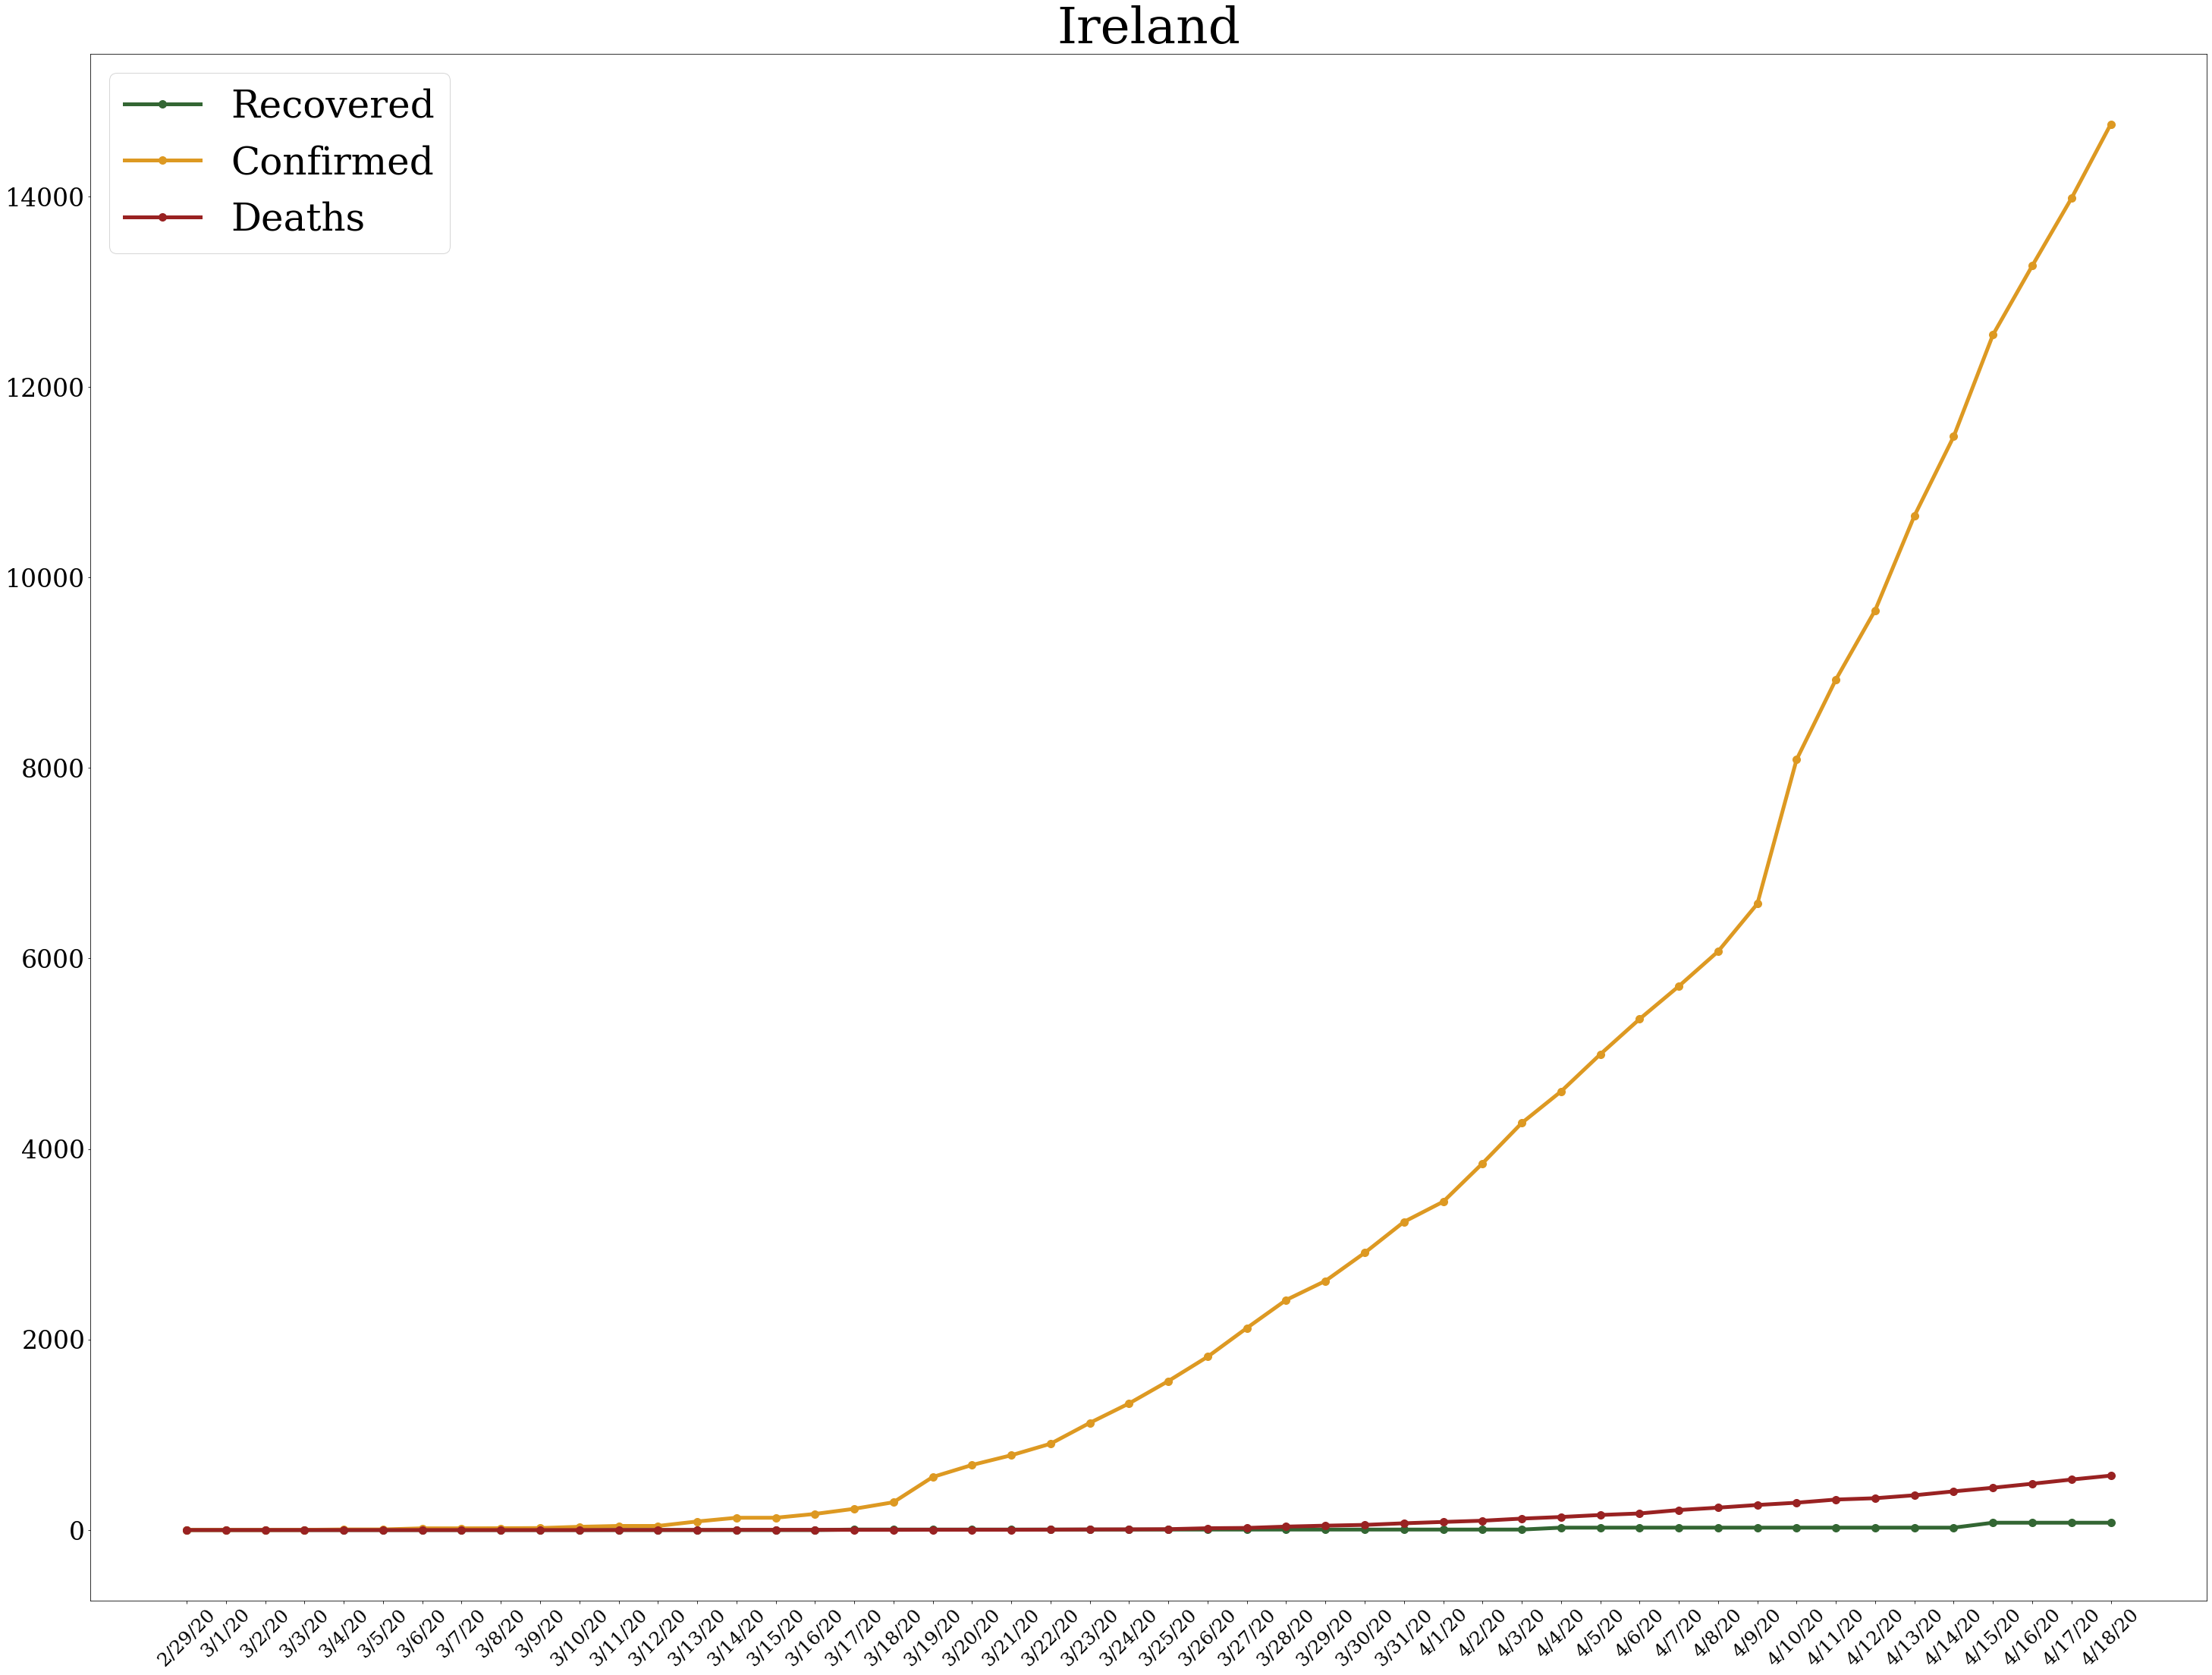

In [13]:
defaultLine = createLine() # default value used

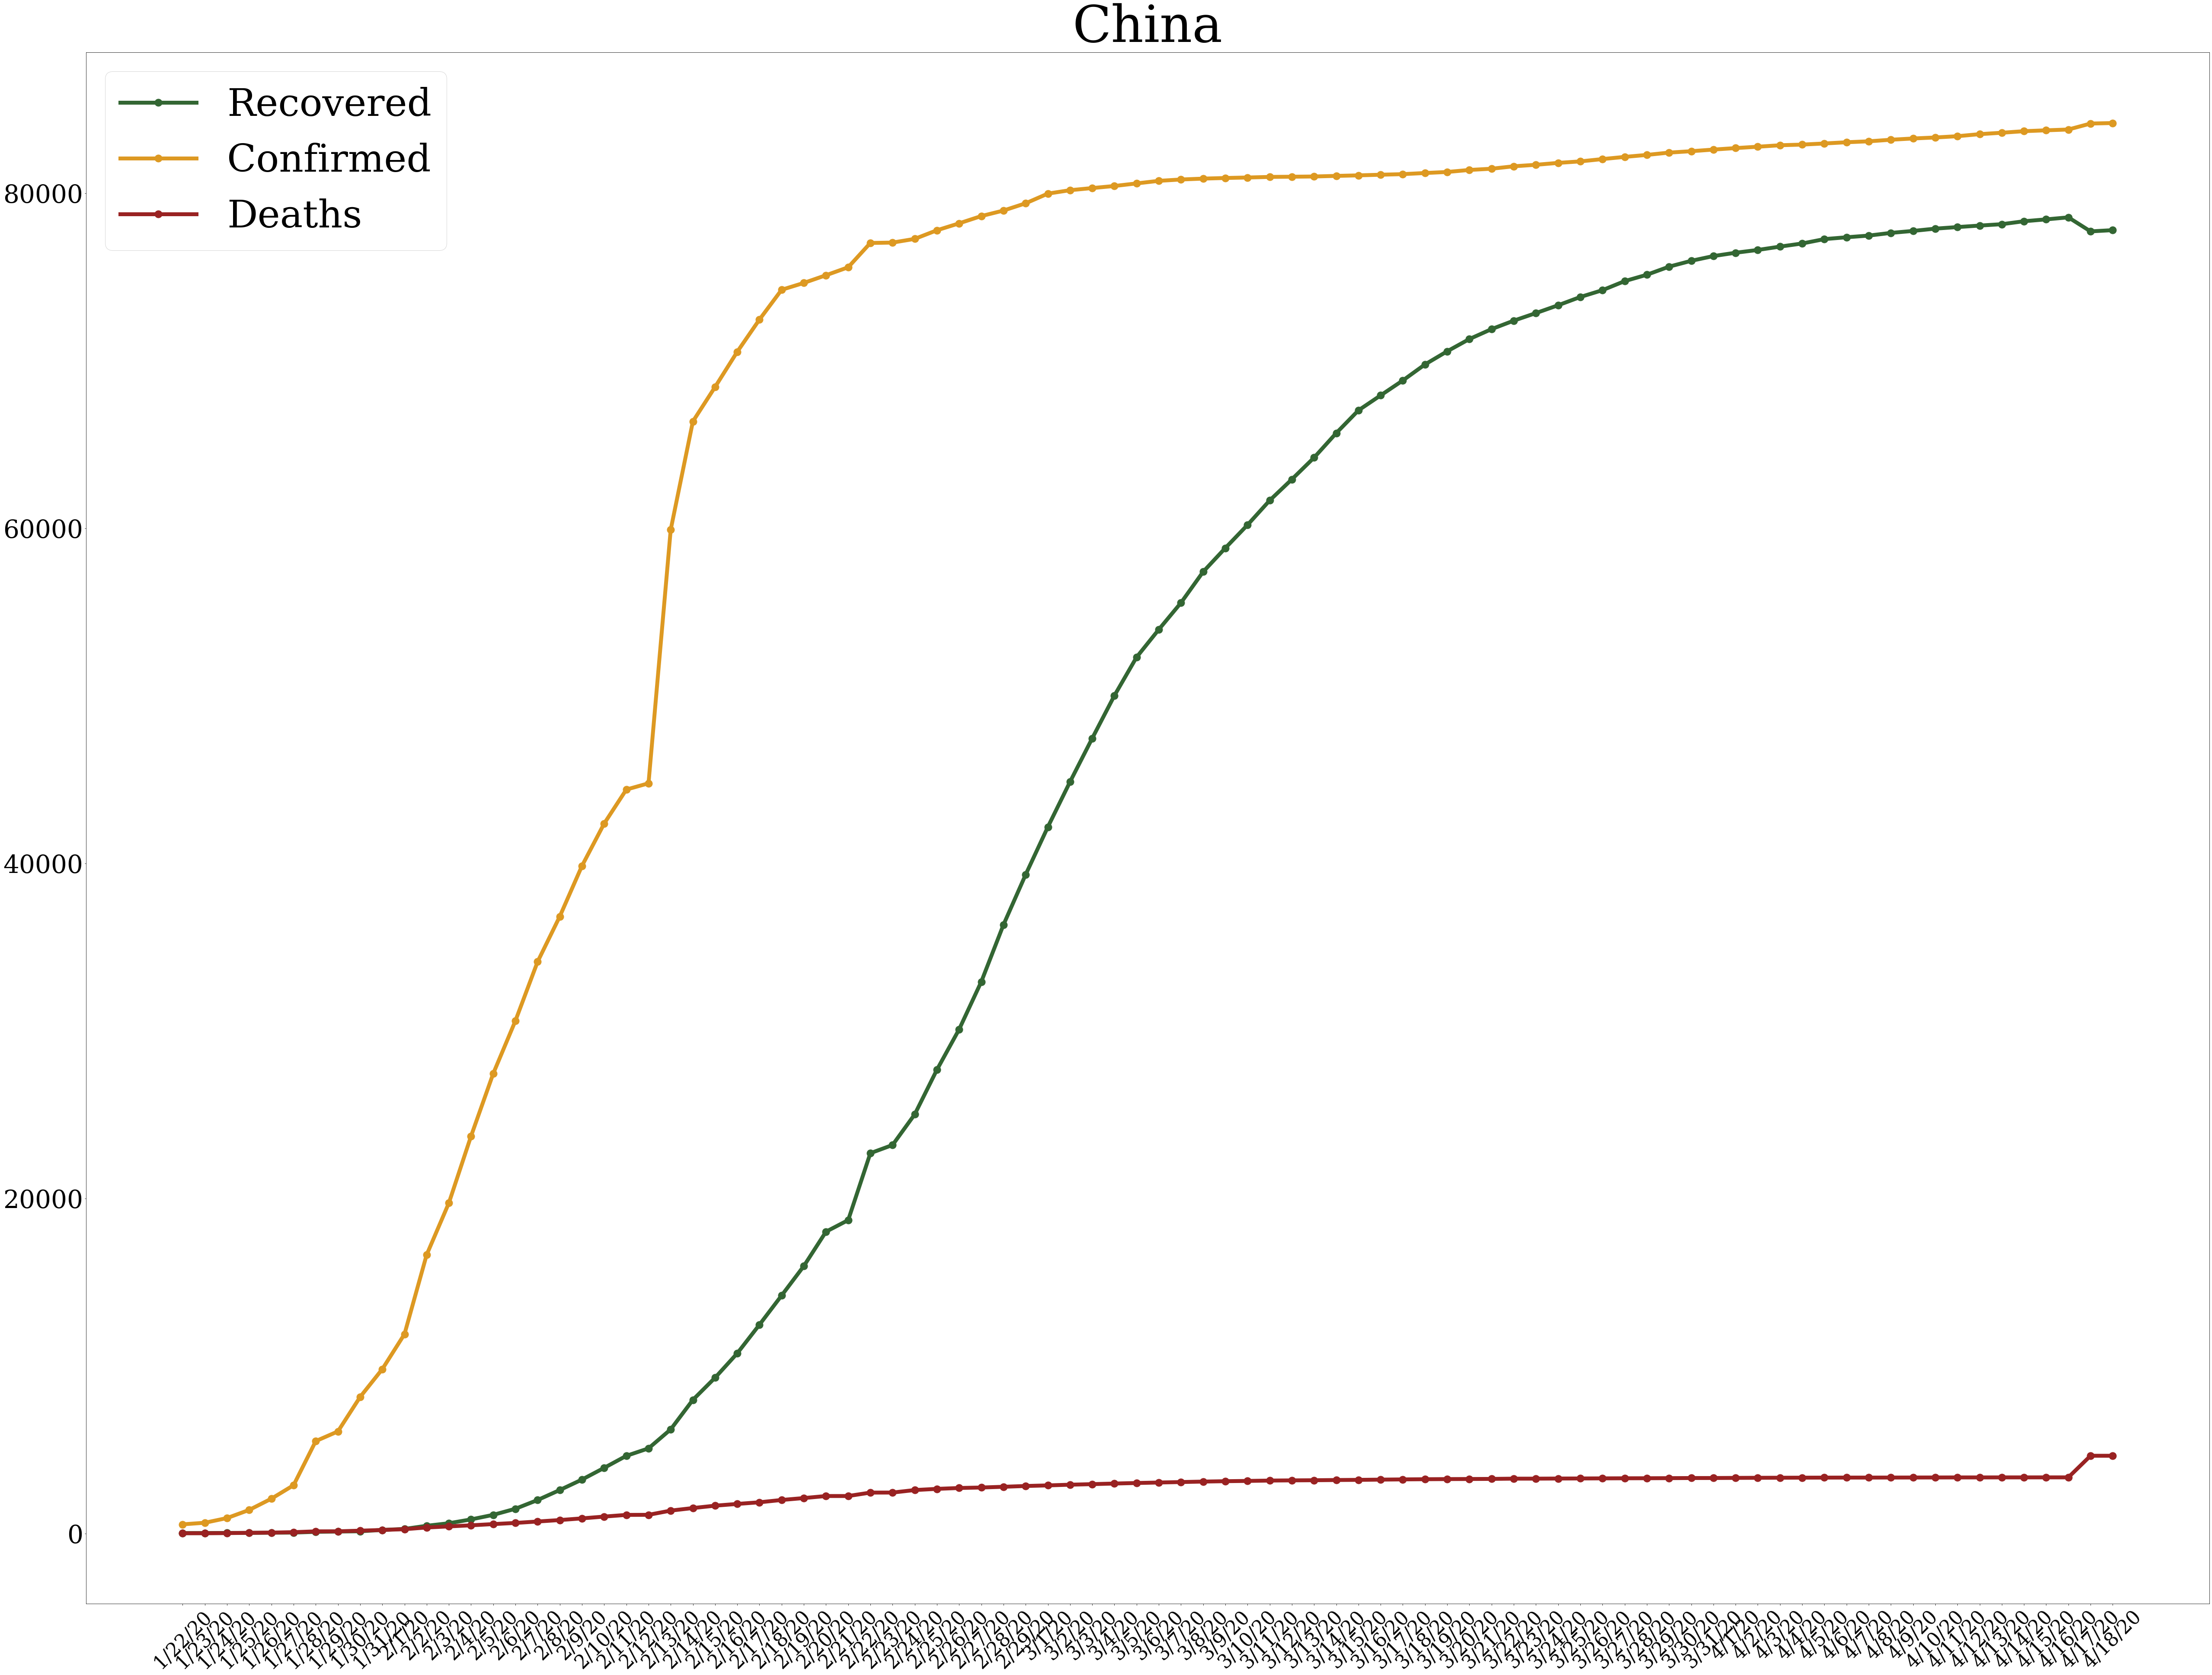

In [14]:
certainLine = createLine('China') # certain value used, conatining three attributes

There is no information about RECOVERED CASES for the place selected.


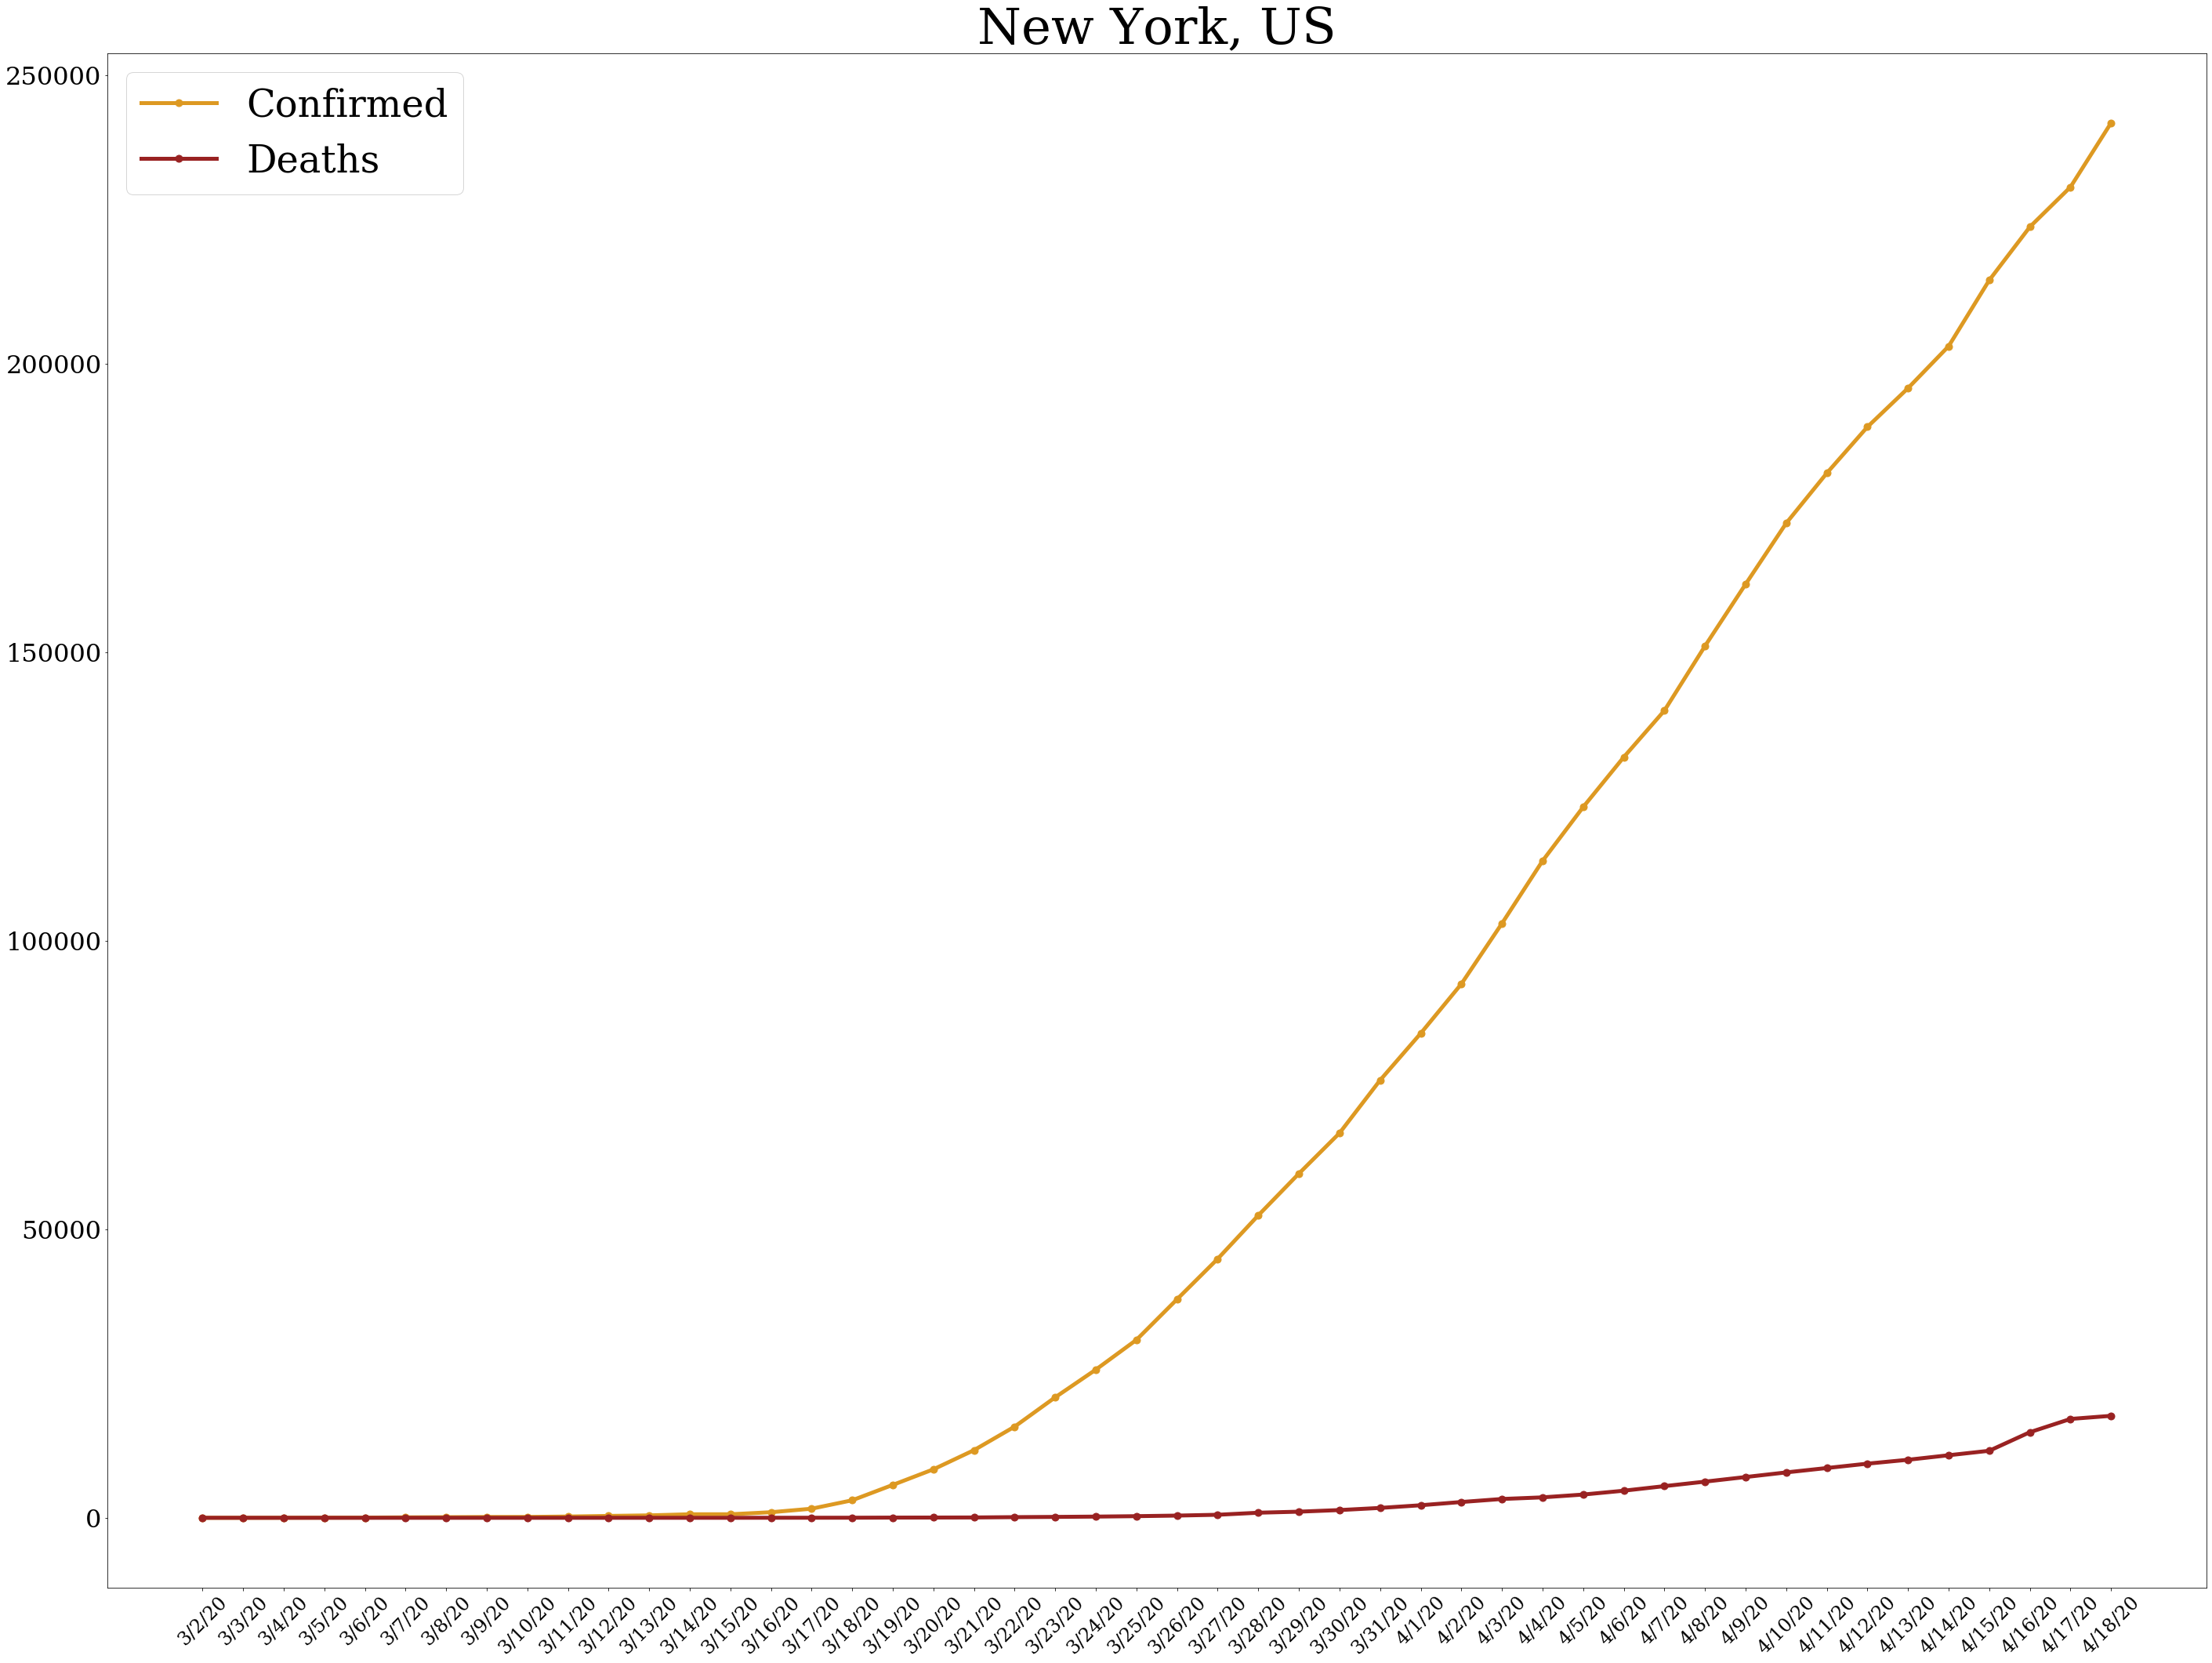

In [15]:
certainLineNew = createLine('New York') # certain value used, containing only two attributes

# 3. Create Map for All the Countries
# 3.1 Functions

In [16]:
def cleanData(data, MM, DD):
    
    if ((MM < 3)|((MM == 3)&(DD < 22))):
        data = data.rename(index=str, columns={"Country/Region": "Country_Region",
                                               "Province/State": "Province_State"})

    data.loc[data['Country_Region']=='Taiwan*', 'Province_State'] = 'Taiwan'
    data.loc[data['Country_Region']=='Taiwan*', 'Country_Region'] = 'China'
    data.loc[data['Province_State']=='Greenland', 'Country_Region'] = 'Greenland'
    data.loc[data['Country_Region']=='US', 'Country_Region'] = 'United States'
    data.loc[data['Country_Region']=='Laos', 'Country_Region'] = 'Lao PDR'
    data.loc[data['Country_Region']=='South Sudan', 'Country_Region'] = 'S. Sudan'
    data.loc[data['Country_Region']=='Burma', 'Country_Region'] = 'Myanmar'
    data.loc[data['Country_Region']=='Dominican Republic', 'Country_Region'] = 'Dominican Rep.'
    data.loc[data['Country_Region']=='Western Sahara', 'Country_Region'] = 'W. Sahara'
    data.loc[data['Country_Region']=='Central African Republic', 'Country_Region'] = 'Central African Rep.'
    data.loc[data['Country_Region']=='Equatorial Guinea', 'Country_Region'] = 'Eq. Guinea'
    data.loc[data['Country_Region']=='Korea, South', 'Country_Region'] = 'Korea'
    data.loc[data['Country_Region']=='Cote d\'Ivoire', 'Country_Region'] = 'Côte d\'Ivoire'
    data.loc[data['Country_Region']=='Congo (Kinshasa)', 'Country_Region'] = 'Dem. Rep. Congo'
    data.loc[data['Country_Region']=='Congo (Brazzaville)', 'Country_Region'] = 'Congo'
    
    grouped = data.groupby('Country_Region', as_index = False)
    temp = np.array(grouped[['Confirmed', 'Deaths', 'Recovered']].agg(np.sum))
    temp = pd.DataFrame(temp, columns = ['PLACE', 'CONFI', 'DEATH', 'RECOV'])
    temp.drop(['DEATH', 'RECOV'], axis = 1, inplace = True)
        
    out = [[temp['PLACE'][i], temp['CONFI'][i]] for i in range(temp.shape[0])]
        
    return out

In [17]:
def createMap(MM = time.localtime(time.time())[1], DD = time.localtime(time.time())[2] - 1):
    
    # 'MM' is the month, and 'DD' is the day
    # running without date, current date would be used
    
    (month, day) = regularDate(MM, DD)
    
    # find the file with its name
    if ((month != None)&(day != None)):
        chartName = '2020-' + month + '-' + day
        
        fileName = './COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/' + month + '-' + day + '-' + '2020.csv'
        temp = pd.read_csv(fileName)
        
        # clean the dataset
        data = cleanData(temp, MM, DD)
        
        # draw the map
        piece = [{"min": 100000, "label": 'more than 100,000', "color": "#FF0000"},
                 {"min": 10000, "max": 99999, "label": '10,000 to 100,000', "color": "#FF5500"},
                 {"min": 1000, "max": 9999, "label": '1,000 to 10,000', "color": "#FF7F50"},
                 {"min": 100, "max": 999, "label": '100 to 1,000', "color": "#FFA500"},
                 {"min": 10, "max": 99, "label": '10 to 100', "color": "#FFDEAD"},
                 {"min": 0, "max": 9, "label":'1 to 10', "color": "#FFEDED"},]

        globalMap = Map()
        globalMap.add(series_name = "", data_pair = data, maptype = "world", is_map_symbol_show = False)
        globalMap.set_series_opts(label_opts = opts.LabelOpts(is_show = False))
        globalMap.set_global_opts(title_opts = opts.TitleOpts(title = ('The distribution of confirmed cases on ' + chartName)), visualmap_opts = opts.VisualMapOpts(max_=740000, is_piecewise = True, pieces = piece))
        globalMap.render_notebook()
        
        return globalMap

## 3.2 Demonstration

In [18]:
createMap().render_notebook() # default value used

In [19]:
createMap(4, 1).render_notebook() # certain value used